# **A PDE Simulation - Poisson's Problem**

## **Given Poisson's equation** 

Poisson's equation is given by:
$$\phi_{xx} + \phi_{yy} = \rho(x,y)$$

We us finite difference method which approximates Poisson's equation:

$$\frac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{h^2}+\frac{\phi_{i,j+1}-2 \phi_{i,j}+\phi_{i,j-1}}{k^2}=\rho_{i,j} \quad (1)$$

Where $$\dfrac{\phi_{i+1,j}-2\phi_{i,j}+\phi_{i-1,j}}{h^2}$$ and $$\dfrac{\phi_{i,j+1}-2 \phi_{i,j}+\phi_{i,j-1}}{k^2}$$ are the numerical approximations for $\phi_{xx}$ and $\phi_{yy}$ respectively.

We rearrange the equation $(1)$ and we get the value of $\phi$ at node $(i,j)$ as follows:

$$\phi_{i,j}=\frac{(\phi_{i+1,j}+\phi_{i-1,j})k^2+(\phi_{i,j+1}+\phi_{i,j-1})h^2-\rho_{i,j}h^2k^2}{2(h^2+k^2)}$$

For Poisson's problem, we will be working with the following value intervals and boundary conditions:

For the **space of study**, we have:

-   $x_{\rm min} = 0.0$

-   $x_{\rm max} = 1.0$

-   $y_{\rm min} = 0.0$

-   $y_{\rm max} = 1.5$

For **the boundary conditions**, we have:

-   The boundary conditions for $\phi$ at the $x_{\rm min}$ boundary are
    **Dirchlet**. Specifically, $\phi(0, y)= -0.1$, for all $y$ values.

    Numericaly speaking: $\phi_{0,j} = -0.1$

-   The boundary conditions for $\phi$ at the $x_{\rm max}$ boundary are
    **Neumann**. Specifically, $\dfrac{d\phi(1.0, y)}{dx} = 0.1$.

Following the numerical approximation, we have: 
$$\dfrac{d\phi(1.0, y)}{dx} = 0.1 \approx	\dfrac{\phi_{n-1, j} - \phi_{n-2, j}}{h} $$
Which leaves us with:
$$\phi_{n-1, j} = \phi_{n-2, j} +0.1h $$

-   The boundary conditions for $\phi$ on the $y_{\rm max}$ and
    $y_{\rm min}$ boundaries are periodic. Specifically,
    $\phi(x,0) = \phi(x,1.5)$, we give it equals to 0.

    Numericaly speaking: $\phi_{i,0} = \phi_{i,m-1} = 0$

**Charge Distribution**

For this problem, we will assume that the charge for each is at exactly
one location. If it is exactly in between location, round UP to the nearest cell. 
The particular cell it lies in will depend on the grid's resolution.

Since the CHARGE DENSITY is needed for the density vector, we need to
divide the actual charge by the area of the node.

$$\rho = \frac{Q}{hk}$$

where $h$ and $k$ are the dimensions of the cells.

The initial charge distribution is:

-   There is a charge of $1.0$ at $(0.3,0.4)$. Which means: $$\rho(0.3,0.4) = \dfrac{1}{hk}$$

-   There is a charge of $-0.5$ at $(0.7,1.2)$. Which means: $$\rho(0.7,1.2) = \dfrac{-0.5}{hk}$$

And **it's zero elsewhere**.


# **Grid Geometry**


The system solution should be made using a center difference finite
difference Poisson solver with a resolution of $n \times m$ elements
corresponding to a physical size of $h \times k$.

With this resolution, the cell sizes will be $$\begin{aligned}
h = \frac{x_{max} - x_{min}}{n} = 1.0 / n \\
k = \frac{y_{max} - y_{min}}{m} = 1.5 / m\end{aligned}$$

The grid has a regular shape, but $h$ and $k$ are not necessarily equal.


At this point, its important to decide what nodes actually have unknown
values.

-   Clearly the left boundary is know because of the initial conditions.

-   The top and bottom boundaries are identical, so only one needs to be
    calculated.

-   The normal derivative at the right boundary is specified, but the
    value is not - thus the value along the right boundary must be
    calculated as well.

# **Implementation**

In this section, we will use finite differences approximation to view the solution of Poisson's problem.

Finite differences method is a well used numerical method that approximates solution of differential equations, especially complicated ones, or equations with hard time to find its solution.

**The great thing about this method is that it converges to the exact solution when the numbers of cells $n$ ad $m$ are large. Which means a small cells sizes $h$ and $k$.**

**Note:** For simplicity of code, we will be working with a square grid, which mean $n = m$. but with different cells sizes $h$ and $k$

In [ ]:
## Libraries to work with
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
## This fuction do all the work
def solve_2d_poisson(phi, lastphi, rho, n, maxtime, h, k):
  
  '''Parameters:
     -----------
     phi: current value
     lastphi: previous phi value 
     rho: density vector
     n: number of horizontal cells
     m: number of vertical cells
     maxtime: time max of iterations
     h and k: cell sizes
  '''
  row, col = phi.shape

  # Density vector
  rho[int(0.3/h), int(0.4/k)] = 1/(h*k)
  rho[int(0.7/h), int(1.2/k)] = -0.5/(h*k)
  
  for time in range(maxtime):  ## commputing the values of phi at each moment
    for r in range(n): 
      lastphi[r] = phi[r]
    for i in range(2, row): ## going around each row
      for j in range(2, col): ## going around column corresponding to the row in question
        ## values of phi at  
        phi[i-1, j-1] = (((lastphi[i-1, j] + lastphi[i-1, j-2])*k**2 + (lastphi[i, j-1] + lastphi[i-2, j-1])*h**2 - rho[i-1, j-1]*h**2*k**2) / (2*(h**2 + k**2)))
    
    ## Boundary conditions
    phi[0, :] = 0 # -0.1
    phi[n-1, :] = 0  # phi[:, 0] #0
    phi[:, 0] = 0  # 0
    phi[:, n-1] = 0  # phi[:, n-2] +0.1*h # 0
      
  return 0

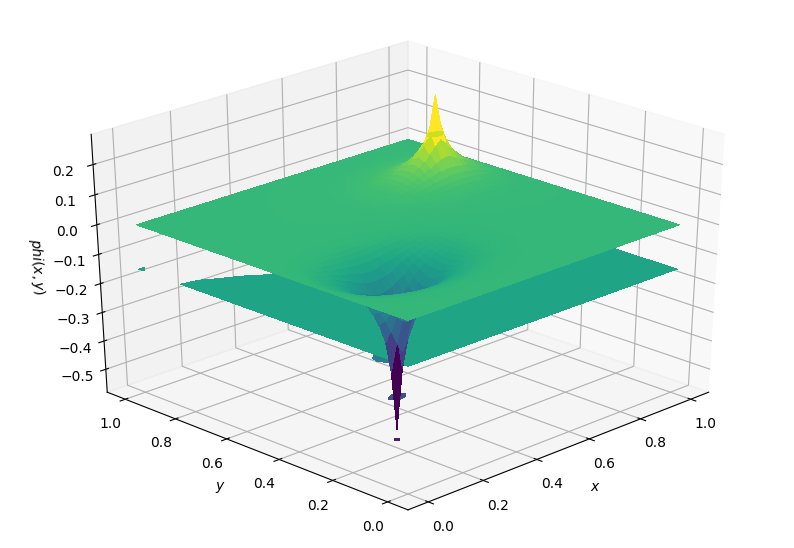

In [ ]:
###variable declarations
n = 50
maxtime = 100

xmin = 0
xmax = 1

ymin = 0
ymax = 1.5

h = (xmax - xmin) / n
k = (ymax - ymin) / n

# Initialization
phi = np.zeros((n, n))
lastphi = np.zeros((n, n))
rho = np.zeros((n, n))

x = np.linspace(xmin, xmax, n)
y = np.linspace(xmin, xmax, n)

solve_2d_poisson(phi, lastphi, rho, n, maxtime, h, k)

fig = plt.figure(figsize=(10, 7), dpi=100)

## 3D View
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, phi)
surf = ax.plot_surface(X, Y, phi, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
ax.view_init(30, 225)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$phi(x, y)$')

plt.show()

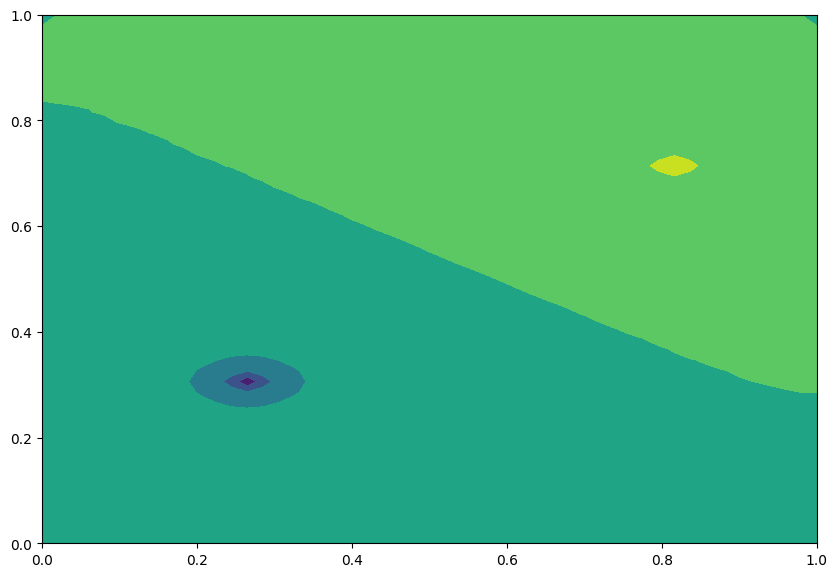

In [ ]:
## 2D View
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10, 7), dpi=100)
plt.contourf(X, Y, phi)

plt.show()